In [3]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [115]:
rat = 4.0
o16 = rat/(1+rat)
(8.77 + 0.1201) + np.log(o16)

np.float64(8.666956448685792)

In [118]:
chis = [15.02086958, 14.70651948]

In [117]:
rat = 6.0
o16 = rat/(1+rat)
o18 = 1/(1+rat)
print(round(o16, 5), round(o18, 5))

0.85714 0.14286


In [80]:
8.798-np.log(0.83333)

np.float64(8.980325556801954)

In [99]:
rats = [6, 6.25, 5.75, 5.5, 7, 4.5, 3.5, 5.0, 4.75, 5.25, 6.75, 4.0]
oabunds = [0.1201, 0.1099,  0.1077, 0.1033, 0.1339, 0.0569, 0.0226, 0.0763, 0.0728, 0.0891, 0.0434, 0.0564]
chis = [3.98475995, 4.07301702, 4.04329559, 4.01036691, 4.28918744, 4.00227881, 4.39863120, 3.92019914, 4.01478922, 3.98034360, 4.15247537, 4.08096677]

In [100]:
np.min(chis)

np.float64(3.92019914)

In [102]:
idxs = np.argsort(rats)
rats = np.array(rats)[idxs]
oabunds = np.array(oabunds)[idxs]
chis = np.array(chis)[idxs]

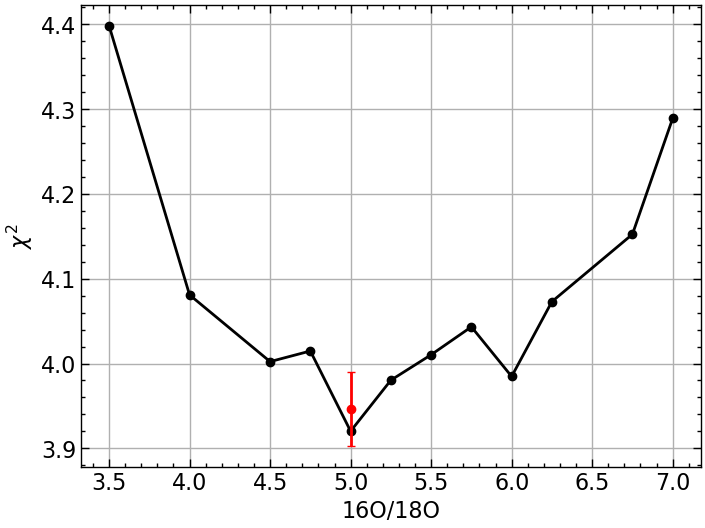

In [107]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(5.0, 3.9463808964947957, 0.04314946022897858, fmt = 'ro', capsize = 3)
plt.xlabel('16O/18O')
plt.ylabel(r'$\chi^2$')
plt.grid()

In [71]:
oabunds = np.array(oabunds)
rats = np.array(rats)
o16rats = rats/(1+rats)
o16s =  (8.77 + oabunds) + np.log(o16rats)
o16s

array([8.54128557, 8.60325645, 8.6262293 , 8.65174476, 8.66397844,
       8.68474661, 8.70624592, 8.71735735, 8.73594932, 8.73147999,
       8.67524966, 8.77036861])

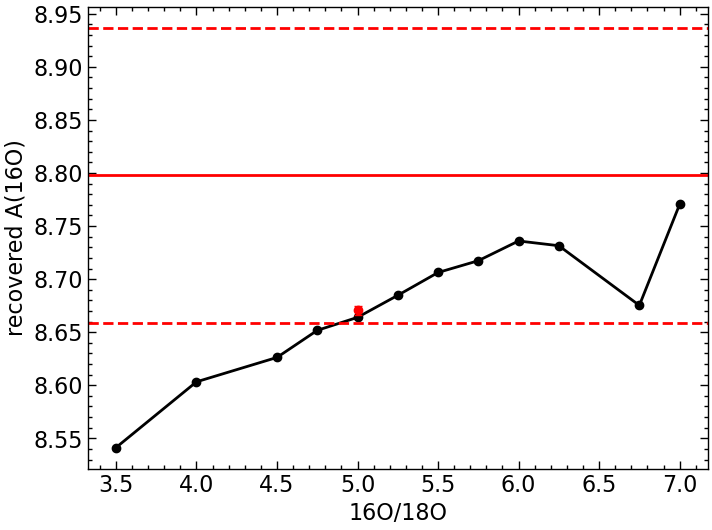

In [113]:
plt.plot(rats, o16s, 'ko-')
plt.errorbar(5.0, 8.77+np.mean(df['O_Fe'])+np.log(0.83333), np.std(df['O_Fe']), fmt = 'ro', capsize = 3)
plt.xlabel('16O/18O')
plt.ylabel('recovered A(16O)')
plt.axhline(8.798, ls='-', color='r')
plt.axhline(8.798-0.139, ls='--', color='r')
plt.axhline(8.798+0.139, ls='--', color='r')

In [120]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21/Sep-29-2024-03-11-48_orat_2.0-8.0/output'
df = pd.read_csv(allpath, sep='\t')
df

,specname,O_Fe,Doppler_Shift_add_to_RV,chi_squared,vmac,red_chi_squared,oisorat
0,ASAS-RCB-21.txt,-0.065647,-0.375123,6.607913,8.0,24.119308,2.00
1,ASAS-RCB-21.txt,-0.054792,-0.367911,6.599896,8.0,23.826919,2.00
2,ASAS-RCB-21.txt,-0.057706,-0.380454,6.598808,8.0,23.891720,2.00
3,ASAS-RCB-21.txt,-0.050058,-0.407344,6.605727,8.0,23.722708,2.00
4,ASAS-RCB-21.txt,-0.037649,-0.355473,5.998269,8.0,21.674285,2.25
...,...,...,...,...,...,...,...
95,ASAS-RCB-21.txt,0.140853,0.333412,4.426753,8.0,16.256139,7.75
96,ASAS-RCB-21.txt,0.152546,0.371675,4.503400,8.0,16.433732,8.00
97,ASAS-RCB-21.txt,0.150193,0.374166,4.508068,8.0,16.485067,8.00
98,ASAS-RCB-21.txt,0.144802,0.372245,4.519012,8.0,16.601310,8.00


In [124]:
rats = np.unique(df['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
for rat in rats:
    subdf = df[df['oisorat'] == rat]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

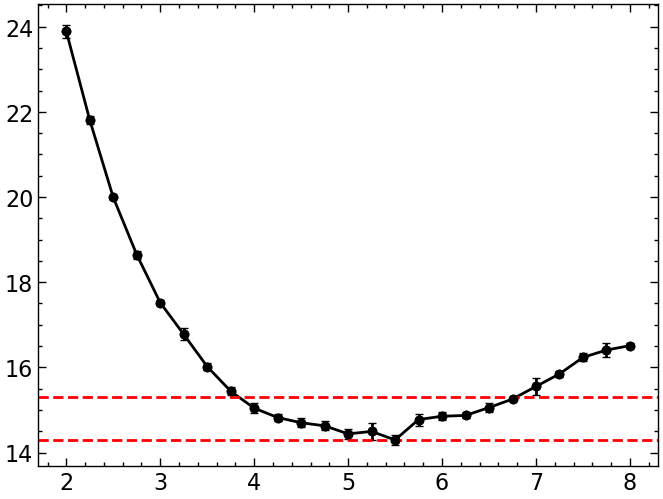

In [134]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
plt.axhline(np.min(chis), ls='--', color='r')
plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axhline(np.min(chis)+2.3, ls='--', color='r')

In [130]:
o16rats = rats/(1+rats)
o16s =  (8.77 + np.array(oabunds)) + np.log(o16rats)

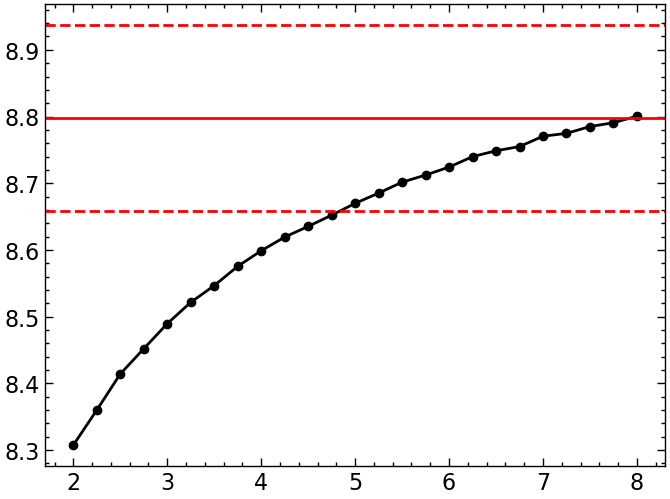

In [132]:
plt.plot(rats, o16s, 'ko-')
# plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
plt.axhline(8.798, ls='-', color='r')
plt.axhline(8.798-0.139, ls='--', color='r')
plt.axhline(8.798+0.139, ls='--', color='r')

In [17]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21/fitlist_asas-rcb-21-fine', sep=' ')

In [18]:
fitlist

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(O),A(Na),A(S),A(Fe),A(Mg),A(Si),A(N),oisorat
0,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.5
1,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.5
2,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.5
3,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.6
4,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.6
5,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.6
6,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.7
7,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.7
8,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.7
9,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.8


In [19]:
rats = np.linspace(3.7,7.3,39)
rats = np.repeat(rats, 5)
len(rats)

195

In [20]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = rats
fitlist2

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(O),A(Na),A(S),A(Fe),A(Mg),A(Si),A(N),oisorat
0,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.7
1,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.7
2,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.7
3,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.7
4,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,7.3
191,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,7.3
192,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,7.3
193,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,7.3


In [21]:
fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21/fitlist_asas-rcb-21-fine2', sep=' ', index=False)

In [4]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21/Sep-30-2024-00-19-45_0.9840928073231175_LTE_O_1D/output'
df1 = pd.read_csv(allpath, sep='\t')
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21/Sep-30-2024-10-54-53_0.5954013395977519_LTE_O_1D/output'
df2 = pd.read_csv(allpath, sep='\t')

In [10]:
df_fine = pd.concat([df1,df2])
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

In [12]:
# rats = np.unique(df['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

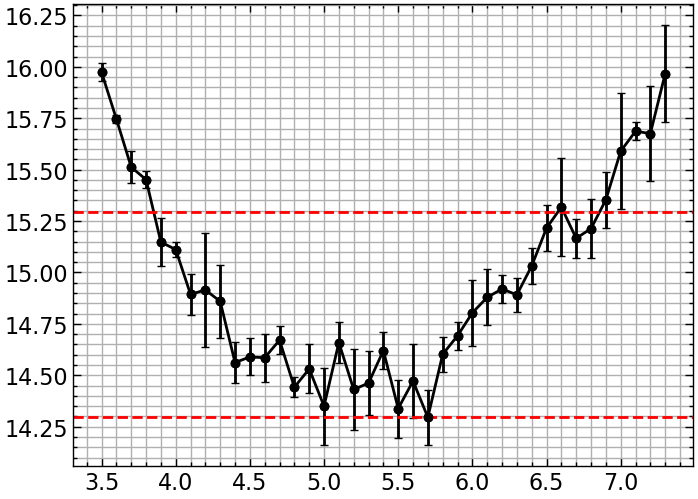

In [14]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
plt.axhline(np.min(chis), ls='--', color='r')
plt.axhline(np.min(chis)+1.0, ls='--', color='r')
plt.grid(which='both')